In [1]:
# !pip install openai
# !pip install scipy
# !pip install matplotlib
# !pip install numpy
# !pip install pandas
# !pip install langchain

# Definition
What is a language model? Well, one way to look at is that a [ language model is simply a statistical model of text](https://colab.research.google.com/drive/1fJ-o-y9WpEFvdbNN8ynqerj3Dws5-zUV?usp=sharing). What does that mean? It means they assign a probabilities to words based on context which allows them to predict future words in a sentence.

<img src="images/ChatGPT-statistical-model.jpg" alt="Alt text" width="500">

For example, given a phrase like: "I love eating..." -> what should come next?

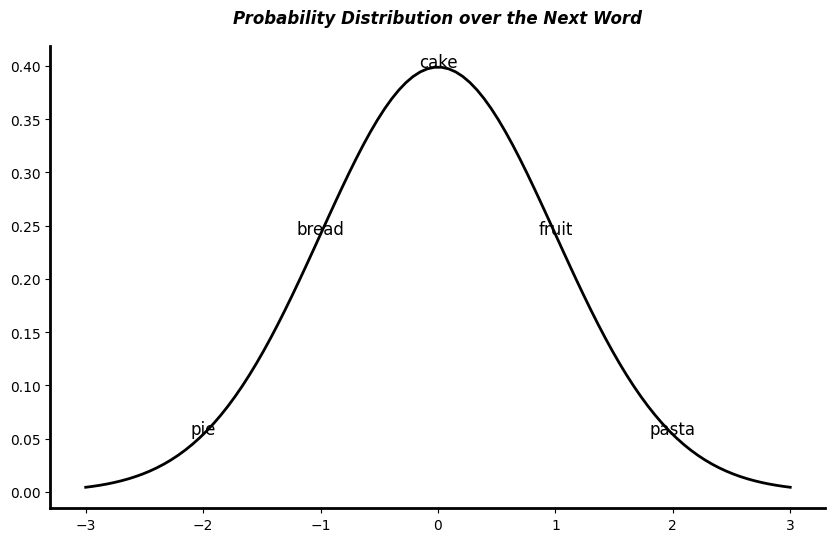

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


# Generate a normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
title_text = "Probability Distribution over the Next Word"
# Update the words and their corresponding positions in the distribution
words = ['pie', 'bread', 'cake', 'fruit', 'pasta']
word_positions = np.linspace(mu - 2*sigma, mu + 2*sigma, len(words))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution with a thicker line and in black
ax.plot(x, y, linewidth=2, color='black')

# Add the words at their corresponding positions
for word, pos in zip(words, word_positions):
    ax.text(pos, stats.norm.pdf(pos, mu, sigma), word, fontsize=12, ha='center')

# Set the title and stylize it
title = ax.text(0.5, 1.05, title_text, 
                size=plt.rcParams["axes.titlesize"],
                ha="center", transform=ax.transAxes, 
                weight='bold', style='italic')

# Remove the frame of the chart
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Make the remaining spines thicker and change their color to black
for spine in ['bottom', 'left']:
    ax.spines[spine].set_linewidth(2)
    ax.spines[spine].set_color('black')

# Change the labels and ticks to black
ax.tick_params(colors='black')

# Show the plot
plt.show()

Let's imagine for example, the simplest Language model we can think of, an unigram model.

That is a model that does not take into account any previous word and each word is modelled independently.

so let's imagine a sentence like:

"When the bough breaks, the craddle will fall"

If we were modelling this with an unigram model, this is what would happen:

In [3]:
import random
sentence = "When the bough breaks the craddle will fall"

tokens = sentence.split(" ")
# First, the token_probs list is created with random values
token_probs = [random.random() for _ in tokens]
# Then, the probabilities dictionary is created
# The dictionary has keys of the form 'word1 word2', where 'word1' and 'word2' are consecutive words in the sentence
# The value for each key is the conditional probability of 'word2' given 'word1'
probabilities = {}
for i in range(len(tokens)):
    if tokens[i] in probabilities.keys():
        probabilities[f"{str(tokens[i])+'-2'}"] = round(token_probs[i],2)
    else:
        probabilities[f"{tokens[i]}"] = round(token_probs[i],2)
probabilities

{'When': 0.36,
 'the': 0.94,
 'bough': 0.53,
 'breaks': 0.9,
 'the-2': 0.31,
 'craddle': 0.99,
 'will': 0.98,
 'fall': 0.96}

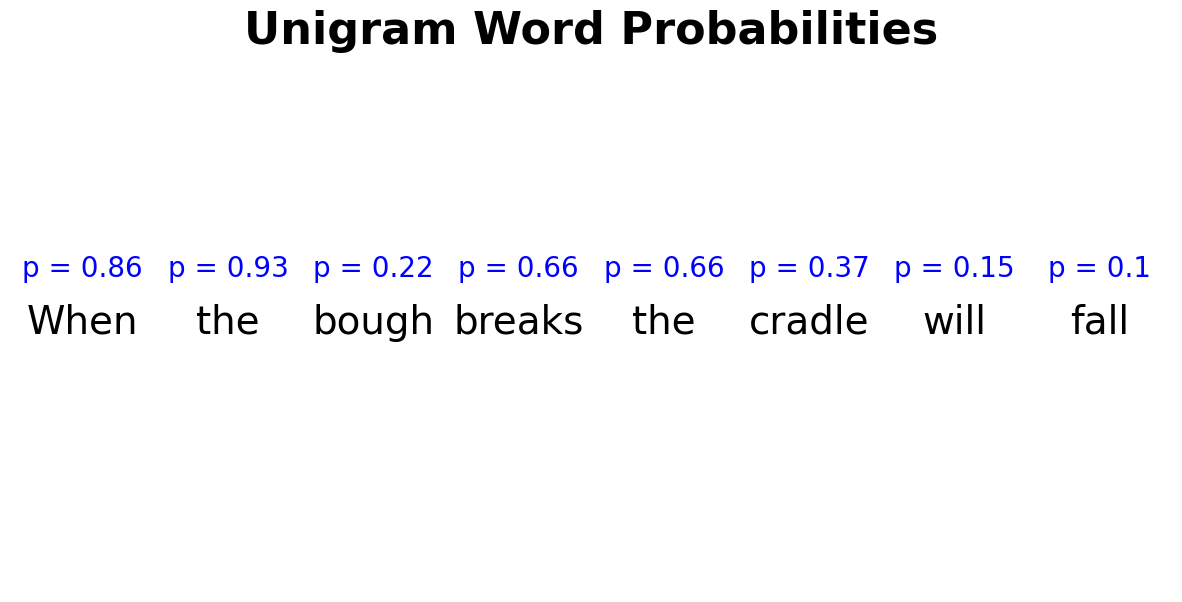

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

probabilities = {'When': 0.86,
 'the': 0.93,
 'bough': 0.22,
 'breaks': 0.66,
 'the-2': 0.66,
 'craddle': 0.37,
 'will': 0.15,
 'fall': 0.1}

# Function to draw an arrow with a curved path (Bezier curve)
def draw_bezier_arrow(ax, start, end, control, color='black', lw=1):
    path = patches.Path([start, control, end], [patches.Path.MOVETO, patches.Path.CURVE3, patches.Path.CURVE3])
    patch = patches.FancyArrowPatch(path=path, color=color, lw=lw, arrowstyle='->', mutation_scale=20)
    ax.add_patch(patch)

sentence = "When the bough breaks the cradle will fall"

words = sentence.split(" ")
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_xlim(-0.5, len(words) - 0.5)
ax.set_ylim(0, 2)

# Plot the words
for i, word in enumerate(words):
    ax.text(i, 1, word, ha='center', va='center', fontsize=28)

# Draw the arrows
for i in range(len(words)):
    start = (i, 1)
    end = (i + 1, 1)
    control = ((i + i + 1) / 2, 1.5)
    #draw_bezier_arrow(ax, start, end, control)

    # Add the conditional probability above the arrow
    prob = list(probabilities.values())[i]
    ax.text((i + i) / 2, 1.2, f'p = {prob}', ha='center', va='center', color='blue', fontsize=20)

# Remove the y-axis
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
# Remove the frame
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

# Set the title
ax.set_title('Unigram Word Probabilities', weight='bold', fontsize=32)
plt.show()

Probability of the sentence is the product of the individual probabilities.

$P(\text{"When the bough breaks the cradle will fall"}) = P(\text{"When"}) \times P(\text{"the"}) \times P(\text{"bough"}) \times P(\text{"breaks"}) \times P(\text{"the"}) \times P(\text{"cradle"}) \times P(\text{"will"}) \times P(\text{"fall"})$

In [5]:
import numpy as np
# probability of the sentence if the product of the individual probabilities
sentence_prob = np.prod(token_probs)
sentence_prob

0.04574293850136178

$P(\text{{"When the bough breaks the cradle will fall"}}) = 0.26 \times 0.40 \times 0.60 \times 0.81 \times 0.84 \times 0.23 \times 0.19 \times 0.18 ~= 0.0003$

This is a simplistic model and doesn't consider the order of words or the context, which is crucial in languages. 

In a bigram model, the probability of a word would depend on the previous word. In a trigram model, the probability of a word would depend on the previous two words, and so on.

For example, a bigram model for the sentence "I like ice cream" would calculate the probability as:

$P(\text{{"I like ice cream"}}) = P(\text{{"I"}}) \times P(\text{{"like"}}|\text{{"I"}}) \times P(\text{{"ice"}}|\text{{"like"}}) \times P(\text{{"cream"}}|\text{{"ice"}})$

Here, $P(\text{"like"}|\text{"I"})$ is the probability of the word 'like' given that the previous word was 'I', and so on. Each probability is conditioned on the preceding word.

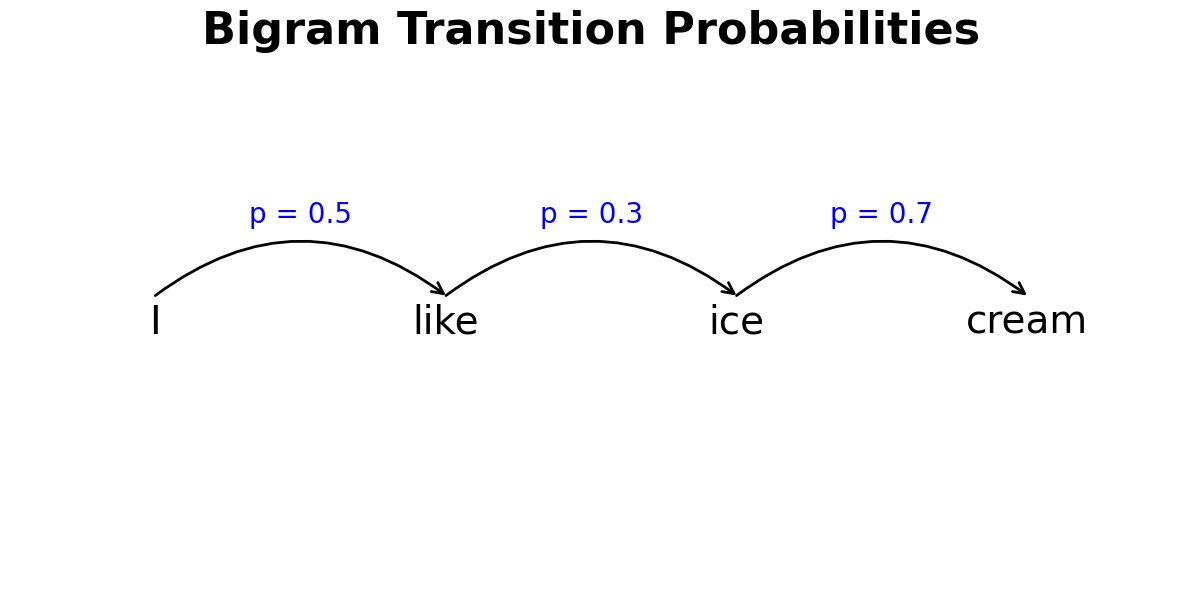

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Function to draw an arrow with a curved path (Bezier curve)
def draw_bezier_arrow(ax, start, end, control, color='black', lw=2):
    path = patches.Path([start, control, end], [patches.Path.MOVETO, patches.Path.CURVE3, patches.Path.CURVE3])
    patch = patches.FancyArrowPatch(path=path, color=color, lw=lw, arrowstyle='->', mutation_scale=20)
    ax.add_patch(patch)

sentence = "I like ice cream"
words = sentence.split(" ")

# Bigram probabilities for the given sentence
probabilities = {
    ('I', 'like'): 0.5,
    ('like', 'ice'): 0.3,
    ('ice', 'cream'): 0.7,
}

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_xlim(-0.5, len(words) - 0.5)
ax.set_ylim(0, 2)

# Plot the words
for i, word in enumerate(words):
    ax.text(i, 1, word, ha='center', va='center', fontsize=28)

# Draw the arrows
for i in range(len(words) - 1):
    start = (i, 1.1)
    end = (i + 1, 1.1)
    control = ((i + i + 1) / 2, 1.5)
    draw_bezier_arrow(ax, start, end, control)

    # Add the conditional probability above the arrow
    bigram = (words[i], words[i + 1])
    prob = probabilities.get(bigram, 0.0)
    ax.text((i + i + 1) / 2, 1.4, f'p = {prob}', ha='center', va='center', color='blue', fontsize=20)

# Remove the y-axis
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

# Remove the frame
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

# Set the title
ax.set_title('Bigram Transition Probabilities', weight='bold', fontsize=32)

plt.show()

That's where more complex models like Bigram, Trigram or N-gram models, Hidden Markov Models, and more recently, Neural Network-based models like RNNs, LSTMs, and Transformers (like GPT) come into the picture.

In essence, __a language model is a model that takes in some context about the past in terms of tokens, words, or sentences and tries to predict the likelihood of a token, word or sentence in the future, allowing it to model complex processes like text generation.__

In [7]:
import numpy as np

def llm_model(context, next_word):
    possible_next_words = ["text", "pie", "pizza", "motor", "cake"]
    next_word_probs = [0.2, 0.3, 0.4, 0.001, 0.6]
    return next_word_probs[possible_next_words.index(next_word)]

context  = ["This", "is", "a", "piece", "of"]
possible_next_words = ["text", "pie", "pizza", "motor", "cake"]
probs = []
for w in possible_next_words:
    probs.append(llm_model(context, w))

next_word = possible_next_words[np.argmax(probs)]
next_word

'cake'

Now, with something like this you can assign a probability to anything that will come next, allowing you to predict the next word given any context.

That means a Language model or LM is in essence a statistical pattern matcher.
However, looking at LMs as a statistical model gives bad intuitions because it prevents us from predicting certain behaviors like these model's ability to perform highly complex tasks like describing the contexts of an SVG image from their SVG file, performing common sense reasoning, understanding social contexts and beyond.

Language models are much more than just statistical pattern matchers, especially modern models based on deep learning architectures like GPT. They are capable of understanding context, capturing long-range dependencies in language, and, to a certain extent, grasping semantic and syntactic rules. 

Rather than statistical pattern matchers, LMs are better thought of as [probabilistic programs](https://arxiv.org/abs/2207.10342).

ANd by that we mean, the idea of being able to draw answers from such models probabilitistically, you can sample then as you would a probability distribution.

## Where does the Large come in?

[Large language models are general-purpose language models that can be pre-trained and fine-tuned for specific purposes.](https://colab.research.google.com/drive/1fJ-o-y9WpEFvdbNN8ynqerj3Dws5-zUV?usp=sharing)

- Large - big size, large number of parameters
- General purpose, commonality of human language, resource restriction
- Pre-trained and fine-tuned

A large language model (LLM) is an advanced artificial intelligence system designed to understand and generate human language. These models are trained on vast amounts of text data to identify patterns and generate responses or produce text that's contextually relevant and grammatically correct.

Another way of looking at it is that an [LLM is a prediction engine that takes in a sequence of words and tries to predict the most likely sequence to come after that sequence.](https://github.com/brexhq/prompt-engineering?utm_source=pocket_reader)

[LLMs are mainly based on the transformer architecture](https://colab.research.google.com/drive/1fJ-o-y9WpEFvdbNN8ynqerj3Dws5-zUV?usp=sharing) and prominent examples of such models are the GPT-series (Generative Pre-trained Transformer) developed by OpenAI. 

These architectures employ deep learning, a subset of machine learning, to create neural networks with many layers. The term "large" refers to the size of these neural networks, as they often contain billions of parameters.

In [9]:
# Example of a language model
import openai
import os
from dotenv import load_dotenv

load_dotenv("../.env")

def get_response(prompt_question):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "system", "content": "You are a helpful research and\
            programming assistant"},
                  {"role": "user", "content": prompt_question}]
    )
    
    return response["choices"][0]["message"]["content"]



openai.api_key = os.environ["OPENAI_API_KEY"]
prompt = "What happens to the craddle when the bough breaks?"
print(get_response(prompt))

When the bough breaks, the cradle falls. This line is from the popular nursery rhyme "Rock-a-bye Baby." It signifies that when the branch or bough holding the cradle breaks or falls, the cradle and the baby inside will also fall to the ground. The rhyme serves as a cautionary tale to express the potential dangers and vulnerability of the cradle and its occupant.


# How Do LLMs Work?

We talked about Language models as statistical models which capture the underlying patterns and structures in language. They learn the probability distribution of words or sequences of words in a given corpus of text, and they are trained on large amounts of text data, used to generate coherent and contextually appropriate text. 

[(Zhao et al. 2023)](https://arxiv.org/pdf/2303.18223.pdf).

Now the language models with which we interact today are a result of an evolution in sequential processing. 

Traditional language models process text in a sequential manner, considering words one at a time. N-gram models like the unigram and bigram which we discussed previously, are examples of n-gram models, where the probability of a word is estimated based on the previous n-1 words. However, such models struggle to capture what we call 'long-range dependencies' and context.

## Transformers Architecture

To fix this issue with traditional sequential models, a paper called ["Attention is All You Need"](https://arxiv.org/pdf/1706.03762.pdf) introduced the Transformers Architecture.


This architecture introduced a groundbreaking shift in language modeling. By leveraging the concept of **attention**, it allowed the model to attend to different words in the input sequence simultaneously. 

This attention mechanism allows the model to selectively focus on different parts of the input sequence when making predictions, enabling the model to capture global dependencies and contextual relationships efficiently, without being constrained by the limitations of traditional sequential processing models like the ones we discussed before.

Instead of relying solely on the previous words, the attention mechanism enables the model to consider the entire input sequence and assign different weights to different words based on their relevance to the current prediction. This enables better understanding of the context and improves the quality of generated text.

In contexts where words can have more than 1 meaning, we need a simple way to decide which word to use. The straight forward approach is to use neighboring words, but how can we do that?

[Attention is a very clever way to tell words apart when they are used in different contexts (which turns word embeddings into contextualized word embeddings).](https://txt.cohere.com/what-is-attention-in-language-models/)

![](transformer_class.png)

# Benefits of Large Language Models (LLMs)

Large Language Models (LLMs) have revolutionized the field of natural language processing and have shown immense potential in various applications. Here are some key benefits of using LLMs:

Multitask Capability: One of the most significant advantages of LLMs is their ability to handle a wide range of tasks. [(Radford et al. 2019)](https://d4mucfpksywv.cloudfront.net/better-language-models/language-models.pdf). This multitask capability is well-documented in the literature. For instance, Peters et al. discuss how models like BERT can be enhanced with structured, human-curated knowledge from multiple knowledge bases, enabling them to perform a wide range of tasks, including relationship extraction, entity typing, and word sense disambiguation [1]. Similarly, Kung et al. demonstrate how ChatGPT, a large language model, performed at or near the passing threshold for all three exams of the United States Medical Licensing Exam (USMLE) without any specialized training or reinforcement [2].

Fine-tuning Process: LLMs can be fine-tuned with a relatively small amount of data, making them adaptable to a wide range of specific tasks. Jiang et al. propose a new learning framework for robust and efficient fine-tuning of pre-trained models to attain better generalization performance [3]. Wang et al. present a novel, structured pruning approach based on low rank factorization and augmented Lagrangian L0 norm regularization, achieving significant inference speedups while matching or outperforming unstructured pruning baselines at various sparsity levels [4].

[Scalability:](https://arxiv.org/pdf/2303.18223.pdf) LLMs demonstrate excellent scalability to very large capacity networks and huge datasets. Khan et al. discuss the straightforward design of Transformers that allows processing multiple modalities using similar processing blocks and demonstrates excellent scalability to very large capacity networks and huge datasets [5]. Chen et al. present a systematic comparison of strategies to represent and train large vocabularies, examining performance on rare words, the speed/accuracy trade-off, and complementarity to Kneser-Ney [6].

# Applications of Large Language Models
    
A. Content Generation: LLMs can generate human-like text. They're used in tasks like writing articles, generating creative stories, or producing marketing copy.

B. Question Answering: LLMs can provide answers to a wide range of questions by generating a text response based on their training data.

C. Translation: Though not their primary purpose, LLMs can provide reasonably accurate translations between languages they were trained on.

D. Tutoring: LLMs can be used in educational software to provide explanations of complex topics, offer help with homework, or guide students through lessons.

E. Personal Assistants: LLMs power virtual personal assistants, helping users with scheduling, reminders, and general information.

# Content Generation

In [10]:
import ipywidgets as widgets
from IPython.display import display, HTML
# Example of a language model
import openai
import time

# Create a HTML string for the image
html_string = """
<div style="text-align: center;">
    <img src='../resources_and_assets/panda_letter.png' style='height: 200px; margin: 10px 0;'>
</div>
"""

# Display the image at the top
display(HTML(html_string))

def get_response_stream(prompt_question):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "system", "content": "You are an expert writer and\
            poet"},
                  {"role": "user", "content": prompt_question}],
    stream=True)
    
    return response


def handle_submit(sender):
    input_text = "Write a short love letter in 5 sentences from a 1700th century Panda who's been at war and is now returning to his lovely Panda Lady Pandesque."
    resp = get_response_stream(input_text)
    chunks = []
    for chunk in resp:
        if "content" in chunk["choices"][0]["delta"]:
            chunk = chunk["choices"][0]["delta"]["content"]
            chunks.append(chunk)

    full_reply = ""
    for chunk in chunks:
        full_reply += chunk + " "
        output_text.value = f'<p style="font-family:gargalin; color:black;">{full_reply}</p>'
        time.sleep(0.1)
        
    
    

submit_button = widgets.Button(description='Write a Letter')
# Create the output widget to display the generated random text.
output_text = widgets.HTML(
    value = "",
    placeholder = '',
    description = 'ChatGPT:',
)
# Register the submit button's click event to call the handle_submit function.
submit_button.on_click(handle_submit)
# Display the widgets.
display(submit_button, output_text)

Button(description='Write a Letter', style=ButtonStyle())

HTML(value='', description='ChatGPT:', placeholder='')

# Translation

In [11]:
import ipywidgets as widgets
from IPython.display import display, HTML
# Example of a language model
import openai

# Create a HTML string for the image
# html_string = """
# <div style="text-align: center;">
#     <img src='../resources_and_assets/owl.png' style='height: 200px; margin: 10px 0;'>
# </div>
# """
# display(HTML(html_string))

def get_response(prompt_question):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "system", "content": "You are a helpful research and\
            programming assistant"},
                  {"role": "user", "content": prompt_question}],
    stream=False)
    
    return response["choices"][0]["message"]["content"]


# Define the dropdown widget
language_dropdown = widgets.Dropdown(
    options=['Portuguese', 'English'],
    value='English',
    description='Language:'
)

output_text = widgets.HTML(value="")
# Define the button widget
input_text = widgets.Text("")
button = widgets.Button(description="Translate", button_style="primary")
# Define the function to be called when the button is clicked
def on_button_click(button):
    chunks = []
    resp = get_response(f"Translate this: {input_text.value} to {language_dropdown.value}")
    output_text.value = f'<p style="font-family:gargalin; color:black;">{resp}</p>'

# Attach the function to the button's click event
button.on_click(on_button_click)
# Display the widgets
display(input_text)
display(language_dropdown)
display(button)
display(output_text)

Text(value='')

Dropdown(description='Language:', index=1, options=('Portuguese', 'English'), value='English')

Button(button_style='primary', description='Translate', style=ButtonStyle())

HTML(value='')

# Q&A 

In [5]:
# source for this code mostly from: https://towardsdatascience.com/run-interactive-sessions-with-chatgpt-in-jupyter-notebook-87e00f2ee461
from langchain.chains import ConversationalRetrievalChain
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import DirectoryLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from datetime import datetime
from IPython.display import HTML, display
from ipywidgets import widgets


def text_eventhandler(*args):
    # Needed bc when we "reset" the text input
    # it fires instantly another event since
    # we "changed" it's value to ""
    if args[0]["new"] == "":
        return

    # Show loading animation
    loading_bar.layout.display = "block"

    # Get question
    question = args[0]["new"]

    # Reset text field
    args[0]["owner"].value = ""

    # Formatting question for output
    q = (
        f'<div class="chat-message-right pb-4"><div>'
        + f'<img src="images/bear.png" class="rounded-circle mr-1" width="40" height="40">'
        + f'<div class="text-muted small text-nowrap mt-2">{datetime.now().strftime("%H:%M:%S")}</div></div>'
        + '<div class="flex-shrink-1 bg-light rounded py-2 px-3 ml-3">'
        + f'<div class="font-weight-bold mb-1">You</div>{question}</div>'
    )

    # Display formatted question
    output.append_display_data(HTML(q))

    try:
        response = qa({"question": f"{question}", "chat_history": chat_history})
        answer = response["answer"]
        chat_history.append((question, answer))
    except Exception as e:
        answer = "<b>Error:</b> " + str(e)

    # Formatting answer for output
    # Replacing all $ otherwise matjax would format them in a strange way
    answer_formatted = answer.replace('$', r'\$')
    a = (
        f'<div class="chat-message-left pb-4"><div>'
        + f'<img src="images/cat.png" class="rounded-circle mr-1" width="40" height="40">'
        + f'<div class="text-muted small text-nowrap mt-2">{datetime.now().strftime("%H:%M:%S")}</div></div>'
        + '<div class="flex-shrink-1 bg-light rounded py-2 px-3 ml-3">'
        + f'<div class="font-weight-bold mb-1">LLM</div>{answer_formatted}</div>'
    )

    # Turn off loading animation
    loading_bar.layout.display = "none"

    output.append_display_data(HTML(a))

loader = DirectoryLoader("./docs/", glob="*.txt")
txt_docs = loader.load_and_split()

embeddings = OpenAIEmbeddings()
txt_docsearch = Chroma.from_documents(txt_docs, embeddings)

llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.2)

chat_history = []
qa = ConversationalRetrievalChain.from_llm(llm, retriever=txt_docsearch.as_retriever())
chat_history = []


in_text = widgets.Text()
in_text.continuous_update = False
in_text.observe(text_eventhandler, "value")
output = widgets.Output()

file = open("../resources_and_assets/loading.gif", "rb")
image = file.read()
# give a title to the chatbot
title = widgets.HTML(
    value="Q&A with .txt files",
)
loading_bar = widgets.Image(
    value=image, format="gif", width="20", height="20", layout={"display": "None"}
)

display(
    widgets.HBox(
        [output],
        layout=widgets.Layout(
            width="100%",
            max_height="500px",
            display="inline-flex",
            flex_flow="column-reverse",
        ),
    )
)

display(
    widgets.Box(
        children=[title, loading_bar, in_text],
        layout=widgets.Layout(display="flex", flex_flow="row"),
    )
)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/greatmaster/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/greatmaster/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Box(children=(HTML(value='Q&A with .txt files'), Image(value=b'GIF89a\xc8\x00\xc8\x00\xf7\x00\x00;Ch\x83\x90\x…

## Limitations and Ethical Considerations

A. Knowledge Limit: LLMs have a cutoff point for their knowledge, based on when they were last trained. They cannot learn or update their knowledge after this point.

B. Understanding Limit: LLMs do not understand text in the same way humans do. They don't have beliefs or desires; they simply predict what comes next based on their training.

C. Ethical Concerns: The use of LLMs raises several ethical issues, such as privacy (since they're trained on public text data), misinformation (as they can generate plausible-sounding but false information), and the potential for misuse (like generating harmful or offensive content).

D. Reproducibility: Although LLMs can be directed by fine-tuning parameters and "prompt engineering", there are no reliable techniques to fully control their behavior. This unpredictability can limit the reproducibility of research results, challenging the fundamental scientific principle of replicability. [(Watkins 2023)](https://link.springer.com/article/10.1007/s43681-023-00294-5)

E. Data Privacy and Protections: Ethical considerations should extend to the acquisition of data for training additional embedding models used in LLM workflows. Ensuring transparency and respect for privacy rights in the process is paramount. [(Watkins 2023)](https://link.springer.com/article/10.1007/s43681-023-00294-5)

F. Bias and Transparency: LLM-generated results may carry inherent biases based on the training data. Researchers must be cognizant of this and actively work to identify and mitigate such biases. The process of using LLMs should be transparent, with clear descriptions of all the tools and techniques used. [(Watkins 2023)](https://link.springer.com/article/10.1007/s43681-023-00294-5)

# Conclusion

LLM's are extremely powerful and here to stay, in the next notebook we'll dive into prompt engineering and how to stear LLMs to do useful things!

# References

- [Dohan, D., Xu, W., Lewkowycz, A., Austin, J., Bieber, D., Lopes, R., et al. (2022). Language Model Cascades.](https://arxiv.org/pdf/2207.10342.pdf)
- [Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A., et al. (2017). Attention Is All You Need.](https://arxiv.org/pdf/1706.03762.pdf)
- [Radford, A., Wu, J., Child, R., Luan, D., Amodei, D., & Sutskever, I. (2019). Language Models are Unsupervised Multitask Learners.](https://d4mucfpksywv.cloudfront.net/better-language-models/language-models.pdf)
- [Dac, V., Ngo, N., Pouran, A., Veyseh, B., Man, H., Dernoncourt, F., et al. (n.d.). ChatGPT Beyond English: Towards a Comprehensive Evaluation of Large Language Models in Multilingual Learning.](https://arxiv.org/pdf/2304.05613.pdf)
- [Chen, S., Hou, Y., Cui, Y., Che, W., Liu, T., & Yu, X. (2020). Recall and Learn: Fine-tuning Deep Pretrained Language Models with Less Forgetting (pp. 7870–7881).](https://aclanthology.org/2020.emnlp-main.634.pdf.) 
- [Zhong, R., Lee, K., Zhang, Z., & Klein, D. (2878). Adapting Language Models for Zero-shot Learning by Meta-tuning on Dataset and Prompt Collections (p. 2856).](https://aclanthology.org/2021.findings-emnlp.244.pdf) 
- https://fullstackdeeplearning.com/llm-bootcamp/spring-2023/prompt-engineering/
- [Watkins, R. (2023). Guidance for researchers and peer-reviewers on the ethical use of Large Language Models (LLMs) in scientific research workflows.](https://doi.org/10.1007/s43681-023-00294-5)
- [Intro to LLMs by Google Cloud](https://www.coursera.org/lecture/introduction-to-large-language-models/introduction-to-large-language-models-aLdSK)
- [Makemore tutorial by Andrej Karpathy](https://www.youtube.com/watch?v=PaCmpygFfXo)
- [Large Language Model Wikipedia](https://en.wikipedia.org/wiki/Large_language_model)
- [What is attention in language models](https://txt.cohere.com/what-is-attention-in-language-models/)
- [Prompt Engineering Guide](https://github.com/brexhq/prompt-engineering?utm_source=pocket_reader)
- [^1^]: [Knowledge Enhanced Contextual Word Representations](https://dx.doi.org/10.18653/v1/D19-1005)
- [^2^]: [Performance of ChatGPT on USMLE: Potential for AI-assisted medical education using large language models](https://dx.doi.org/10.1371/journal.pdig.0000198)
- [^3^]: [SMART: Robust and Efficient Fine-Tuning for Pre-trained Natural Language Models through Principled Regularized Optimization](https://dx.doi.org/10.18653/v1/2020.acl-main.197)
- [^4^]: [Structured Pruning of Large Language Models](https://dx.doi.org/10.18653/v1/2020.emnlp-main.496)
- [^5^]: [Transformers in Vision: A Survey](https://dx.doi.org/10.1145/3505244)
- [^6^]: [Strategies for Training Large Vocabulary Neural Language Models](https://dx.doi.org/10.18653/v1/P16-1186)